(540, 2500) (540,)


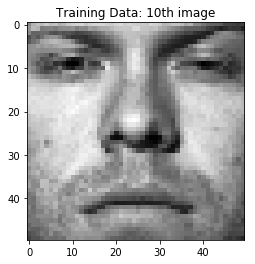

In [1]:
#1b
#Load training and testing data
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10].reshape(50,50), cmap = cm.Greys_r)
plt.title('Training Data: 10th image')
plt.show()

(100, 2500) (100,)


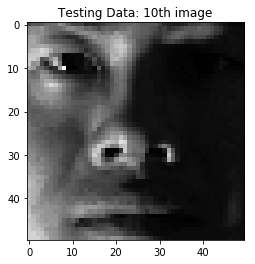

In [2]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10].reshape(50,50), cmap = cm.Greys_r)
plt.title('Testing Data: 10th image')
plt.show()

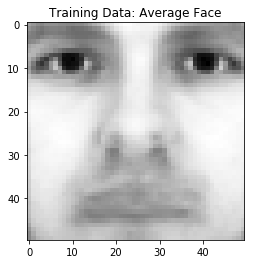

In [3]:
#1c
#Average Face. 
#Compute the average face μ from the whole training set by summing up every column in X 
#then dividing by the number of faces. Display the average face as a grayscale image.
#Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html

#sum every column in training data and divide it by the number of faces
average_values = np.sum(train_data, axis=0)/train_data.shape[0]

# display average face as a grayscale image
plt.imshow(average_values.reshape(50,50), cmap=cm.Greys_r)
plt.title('Training Data: Average Face')
plt.show()

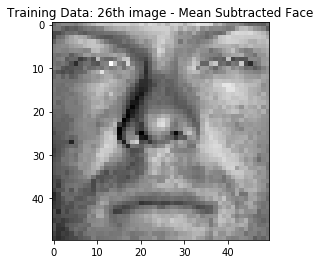

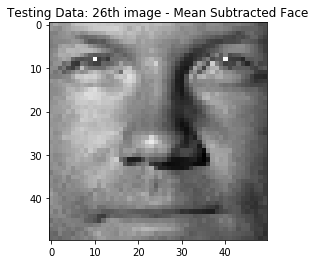

In [4]:
#1d
#Mean Subtraction. 
#Subtract average face μ from every column in X. That is, xi := xi − μ, where xi is the i-th column of X. 
#Pick a face image after mean subtraction from the new X and display that image in grayscale. 
#Do the same thing for the test set Xtest using the pre- computed average face μ in (c).
#Source : https://stackoverflow.com/questions/21516089/difference-between-two-numpy-arrays-in-python

mean_subtracted_train_data = train_data - average_values
mean_subtracted_test_data = test_data - average_values

# display average face as a grayscale image
plt.imshow(mean_subtracted_train_data[26].reshape(50,50), cmap=cm.Greys_r)
plt.title('Training Data: 26th image - Mean Subtracted Face')
plt.show()
plt.imshow(mean_subtracted_test_data[26].reshape(50,50), cmap=cm.Greys_r)
plt.title('Testing Data: 26th image - Mean Subtracted Face')
plt.show()

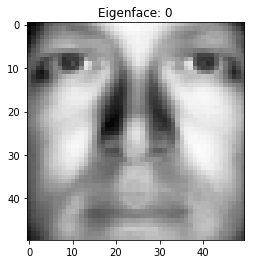

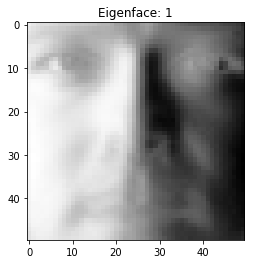

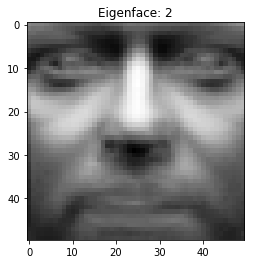

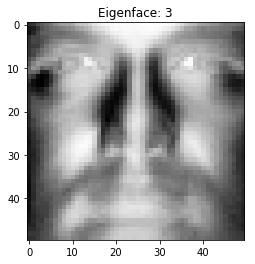

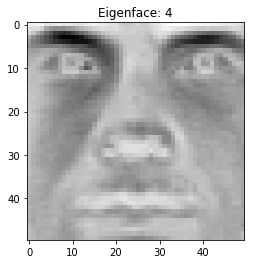

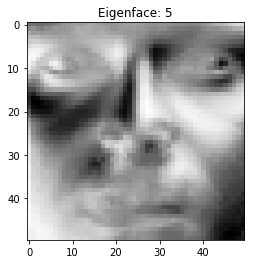

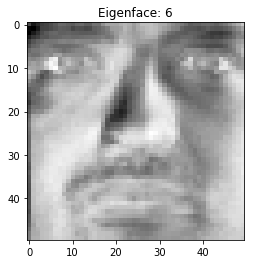

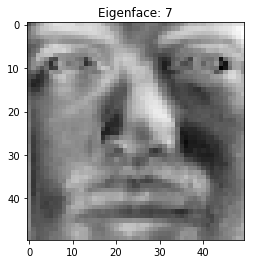

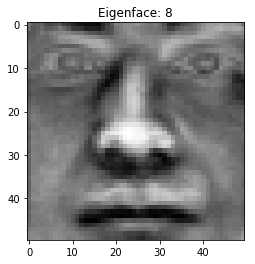

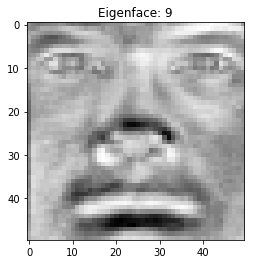

In [5]:
#1e
#Eigenface. 
#Perform Singular Value Decomposition (SVD) on training set X (X = UΣVT ) to get matrix VT , 
#where each row of VT has the same dimension as the face image. 
#We refer to vi, the i -th row of VT , as i -th eigenface. Display the first 10 eigenfaces as 10 images in grayscale.
#Source: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html

U, s, V = np.linalg.svd(mean_subtracted_train_data)

for i in range(10):
    plt.figure()
    plt.imshow(V[i].reshape(50,50), cmap=cm.Greys_r)
    plt.title('Eigenface: %s'%i)

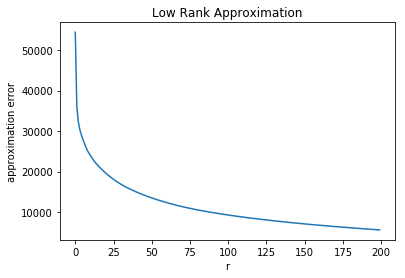

In [8]:
#1f
#Low-rank Approximation. 
#Since Σ is a diagonal matrix with non-negative real numbers on the diagonal in non-ascending order, 
#we can use the first r elements in Σ together with first r columns in U and first r rows in VT to approximate X. 
#That is, we can approximate X by Xˆr = U[:,: r] Σ[: r,: r] VT [: r,:]. 
#The matrix Xˆr is called rank-r approximation of X. Plot the rank-r approximation error∥X−Xˆr∥F 2 as a function 
#of r when r =1,2,...,200.
#Source: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html

rankR_approximation_error = []
for r in range(1,201):
    #multiply all three matrices to get an approximate rank-r approximation of X
    XHatR = np.dot(np.dot(U[:,:r] , np.diag(s[:r])), V[:r,:])
    
    X = mean_subtracted_train_data
    Frobenius_norm = np.linalg.norm(X-XHatR)#calculate the approximation error by getting the Frobenius norm 
    rankR_approximation_error.append(Frobenius_norm)
    
plt.plot(rankR_approximation_error)
plt.title('Low Rank Approximation')
plt.xlabel('r')
plt.ylabel('approximation error')
plt.show()

In [9]:
#1g
#Eigenface Feature. 
#The top r eigenfaces VT [: r,:] = {v1,v2,...,vr }T span an r-dimensional linear subspace of the 
#original image space called face space, whose origin is the average face μ, and whose axes are the 
#eigenfaces {v1,v2,...,vr}. Therefore, using the top r eigenfaces {v1,v2,...,vr},we can represent a 2500-dimensional 
#face image z as an r-dimensional feature vector f: f = VT [: r,:] z = [v1,v2,...,vr ]T z. 
#Write a function to generate r-dimensional feature matrix F and Ftest for training images X and 
#test images Xtest, respectively (to get F, multiply X to the transpose of first r rows of VT , 
#F should have same number of rows as X and r columns; similarly for Xtest).

# print ('X',mean_subtracted_train_data.shape)
# print (U.shape)
# print (s.shape)
# print (V.shape)

def generateFeatureMatrixF(X, V, r):
    return np.dot(X,np.transpose((V)[:r,:]))

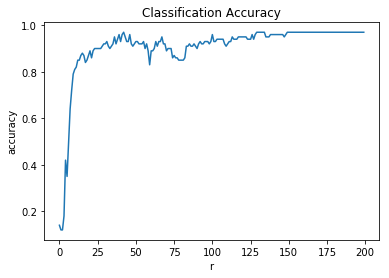

In [10]:
#1h
#Face Recognition. 
#Extract training and test features for r = 10. Train a Logistic Regression model using F and test on Ftest. 
#Report the classification accuracy on the test set. Plot the classification accuracy on the test set as a 
#function of r when r = 1,2,...,200. Use “one-vs- rest” logistic regression, where a classifier is trained for 
#each possible output label. Each classifier is trained on faces with that label as positive data and all faces 
#with other labels as negative data. sklearn calls this “ovr” mode.

from sklearn import linear_model
logistic_regression = linear_model.LogisticRegression()

accuracy = []
for r in range(1,201):
    F = generateFeatureMatrixF(mean_subtracted_train_data,V,r)
    Ftest = generateFeatureMatrixF(mean_subtracted_test_data,V,r)
    #train logistic regression model using F; classifier is trained for each possible output label
    logistic_regression.fit(F,train_labels)
    #test model on Ftest
    mean_accuracy = logistic_regression.score(Ftest,test_labels)
    accuracy.append(mean_accuracy)

#Plot the classification accuracy as a function of r
plt.plot(accuracy)
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('r')